In [2]:
import gymnasium as gym
import numpy as np
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import heapq
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import imageio

# Create FrozenLake environment
environment = gym.make('FrozenLake-v1', is_slippery=False, render_mode="rgb_array", desc=generate_random_map(8))

# Get environment information
n_states = environment.observation_space.n
n_actions = environment.action_space.n
grid_size = int(np.sqrt(n_states))  # Assuming a square grid

# Define possible actions (0: left, 1: down, 2: right, 3: up)
actions = {
    0: (0, -1),  # Left
    1: (1, 0),   # Down
    2: (0, 1),   # Right
    3: (-1, 0)   # Up
}

## BnB

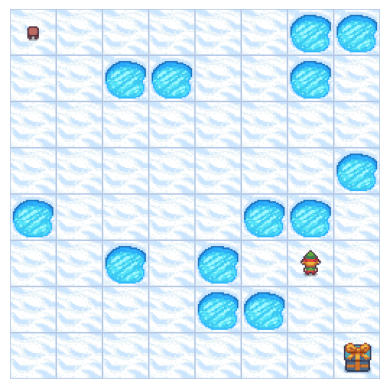

✅ Path found by Branch and Bound: [0, 1, 9, 17, 18, 19, 27, 35, 43, 51, 59, 60, 61, 62, 63]


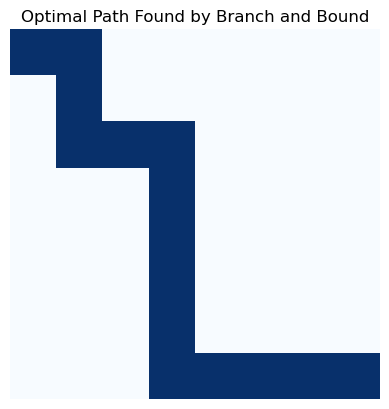

🎞️ GIF saved as frozenlake_branch_bound.gif


In [3]:
# Helper functions
def state_to_coord(state):
    return (state // grid_size, state % grid_size)

def coord_to_state(coord):
    return coord[0] * grid_size + coord[1]

frames = []  # To store frames for GIF

def render_env(environment, delay=0.3, collect_frames=False):
    clear_output(wait=True)
    frame = environment.render()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    if collect_frames:
        # Ensure frame is copied and RGB
        frames.append(np.array(frame))
    time.sleep(delay)

# Branch and Bound Algorithm
def branch_and_bound(environment, start_state, goal_state):
    open_list = []
    heapq.heappush(open_list, (0, start_state, [start_state]))
    g_score = {start_state: 0}
    visited = set()

    while open_list:
        curr_g, current_state, path = heapq.heappop(open_list)
        if current_state == goal_state:
            return path
        visited.add(current_state)

        for action in actions:
            dx, dy = actions[action]
            x, y = state_to_coord(current_state)
            nx, ny = x + dx, y + dy

            if 0 <= nx < grid_size and 0 <= ny < grid_size:
                neighbor_state = coord_to_state((nx, ny))
                environment.reset()
                environment.unwrapped.s = current_state
                new_state, reward, done, _, _ = environment.step(action)

                print(f"\n➡️ Taking action {action} from state {current_state}...")
                render_env(environment, collect_frames=True)

                if reward == 0 and done:
                    continue

                tentative_g_score = curr_g + 1
                if neighbor_state not in g_score or tentative_g_score < g_score[neighbor_state]:
                    g_score[neighbor_state] = tentative_g_score
                    heapq.heappush(open_list, (tentative_g_score, neighbor_state, path + [neighbor_state]))

    return None

# Run the algorithm
start_state, _ = environment.reset()
goal_state = n_states - 1
path = branch_and_bound(environment, start_state, goal_state)

# Plot the final path
if path:
    print("✅ Path found by Branch and Bound:", path)
    grid = np.zeros((grid_size, grid_size))
    for state in path:
        x, y = state_to_coord(state)
        grid[x, y] = 2

    plt.imshow(grid, cmap='Blues')
    plt.title("Optimal Path Found by Branch and Bound")
    plt.axis("off")
    plt.show()

    # Save the GIF
    gif_filename = "frozenlake_branch_bound.gif"
    imageio.mimsave(gif_filename, frames, fps=2)
    print(f"🎞️ GIF saved as {gif_filename}")
else:
    print("❌ No path found.")


## A*

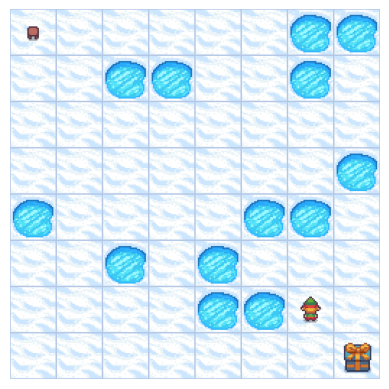

✅ Path found by A*: [0, 1, 9, 17, 18, 19, 27, 35, 43, 51, 59, 60, 61, 62, 63]


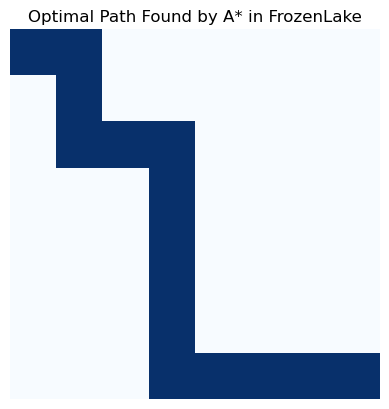

🎞️ GIF saved as frozenlake_astar.gif


In [5]:
# State <-> Coordinate
def state_to_coord(state):
    return (state // grid_size, state % grid_size)

def coord_to_state(coord):
    return coord[0] * grid_size + coord[1]

# Heuristic
def manhattan_heuristic(curr, goal):
    x1, y1 = state_to_coord(curr)
    x2, y2 = state_to_coord(goal)
    return abs(x1 - x2) + abs(y1 - y2)

# Frame list
frames = []

# Rendering utility
def render_env(environment, delay=0.3, collect_frames=True):
    clear_output(wait=True)
    frame = environment.render()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    if collect_frames:
        frames.append(np.array(frame))  # Ensure proper format
    time.sleep(delay)

# A* algorithm
def a_star_search(environment, start_state, goal_state):
    open_list = []
    heapq.heappush(open_list, (0, 0, start_state, [start_state]))
    g_score = {start_state: 0}
    visited = set()

    while open_list:
        f_score, curr_g, current_state, path = heapq.heappop(open_list)
        if current_state == goal_state:
            return path

        visited.add(current_state)

        for action in actions:
            dx, dy = actions[action]
            x, y = state_to_coord(current_state)
            nx, ny = x + dx, y + dy

            if 0 <= nx < grid_size and 0 <= ny < grid_size:
                neighbor_state = coord_to_state((nx, ny))

                environment.reset()
                environment.unwrapped.s = current_state
                new_state, reward, done, _, _ = environment.step(action)

                print(f"\n➡️ Taking action {action} from state {current_state}...")
                render_env(environment, collect_frames=True)

                if reward == 0 and done:
                    continue

                tentative_g_score = curr_g + 1
                if neighbor_state not in g_score or tentative_g_score < g_score[neighbor_state]:
                    g_score[neighbor_state] = tentative_g_score
                    f_score = tentative_g_score + manhattan_heuristic(neighbor_state, goal_state)
                    heapq.heappush(open_list, (f_score, tentative_g_score, neighbor_state, path + [neighbor_state]))

    return None

# Main
start_state, _ = environment.reset()
goal_state = n_states - 1
path = a_star_search(environment, start_state, goal_state)

# Display final path and save GIF
if path:
    print("✅ Path found by A*:", path)
    grid = np.zeros((grid_size, grid_size))
    for state in path:
        x, y = state_to_coord(state)
        grid[x, y] = 2

    plt.imshow(grid, cmap='Blues')
    plt.title("Optimal Path Found by A* in FrozenLake")
    plt.axis("off")
    plt.show()

    gif_path = "frozenlake_astar.gif"
    imageio.mimsave(gif_path, frames, fps=2)
    print(f"🎞️ GIF saved as {gif_path}")
else:
    print("❌ No path found.")
